In [36]:
import pandas as pd
import json

with open('mpathic_pf.json') as f:
    data = json.load(f)

In [37]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data['analytics']['speaker_analytics'], 
                     meta=['id', ['analytics', 'utterance_count'], ['analytics', 'talk_turn_count']])

# Rename the columns for clarity
# df.columns = ['Title', 'Author_First_Name', 'Author_Last_Name', 'Publisher_Name', 'Publisher_Location']
df.columns = ['Speaker', 'role', 'Utterance_count', 'Talk_turn_count',
       'appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',
       'reflective_listening',
       'analytics.frequencies.appreciation', 'analytics.frequencies.conflict',
       'analytics.frequencies.confront',
       'analytics.frequencies.instruct_direction',
       'analytics.frequencies.instruct', 'analytics.frequencies.low_curiosity',
       'analytics.frequencies.high_curiosity',
       'analytics.frequencies.preparation',
       'analytics.frequencies.reflective_listening',
       'analytics.metrics.collaboration.contributing_behaviors',
       'analytics.metrics.collaboration.score',
       'analytics.metrics.curiosity.contributing_behaviors',
       'analytics.metrics.curiosity.score',
       'analytics.metrics.empathy.contributing_behaviors',
       'analytics.metrics.empathy.score']

# Display the DataFrame
print(df)
print(df.columns)

   Speaker role  Utterance_count  Talk_turn_count  appreciation  conflict  \
0  VINCENT                    36               27             0         7   
1    JULES                   128               53             4        30   
2   PATRON                     2                1             0         0   
3  PUMPKIN                    41               33             1         4   
4  YOLANDA                    24               14             0         7   
5  MANAGER                    10                5             0         0   

   confront  instruct_direction  instruct  low_curiosity  ...  \
0         1                   0         0              4  ...   
1        13                   3         0              5  ...   
2         0                   0         0              0  ...   
3         5                   0         0              3  ...   
4         6                   0         0              1  ...   
5         1                   0         0              0  ...   

   a

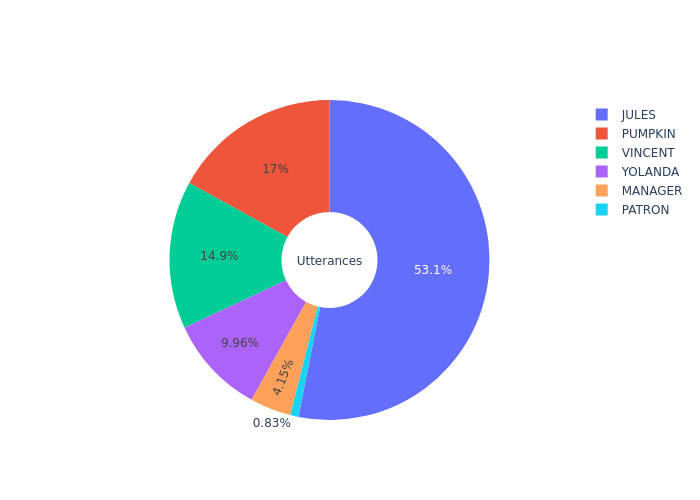

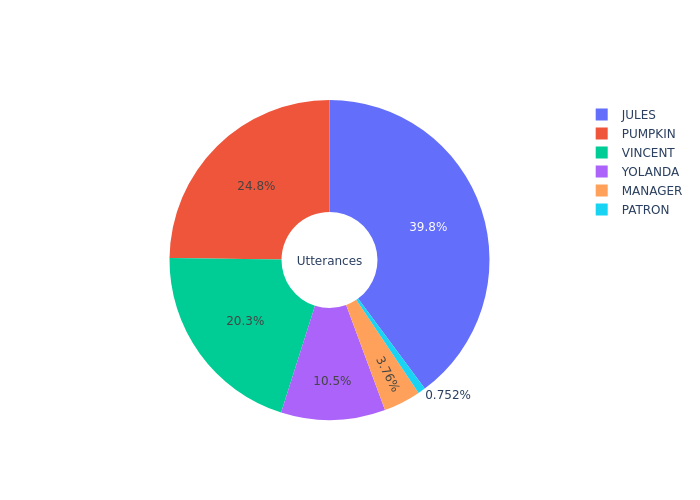

In [38]:
import plotly.graph_objects as go


labels = df['Speaker']
values = df['Utterance_count']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,title="Utterances", hole=.3)] )
fig.show("png")

labels = df['Speaker']
values = df['Talk_turn_count']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,title="Utterances", hole=.3)] )
fig.show("png")

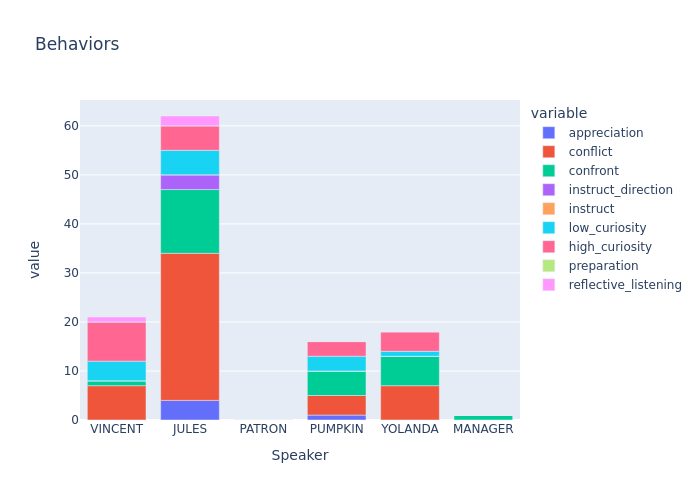

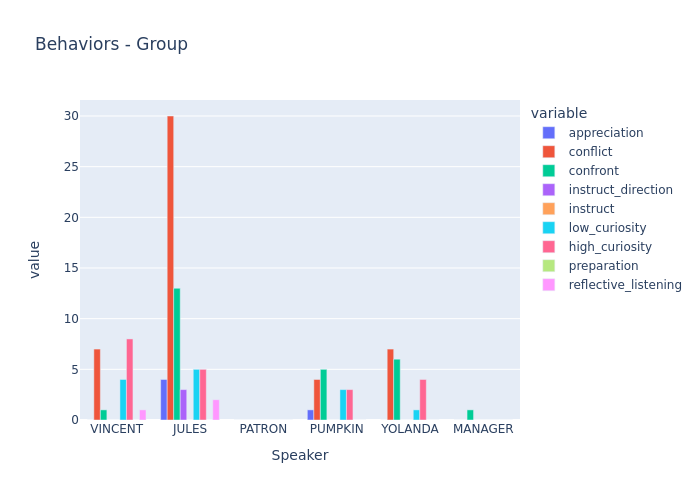

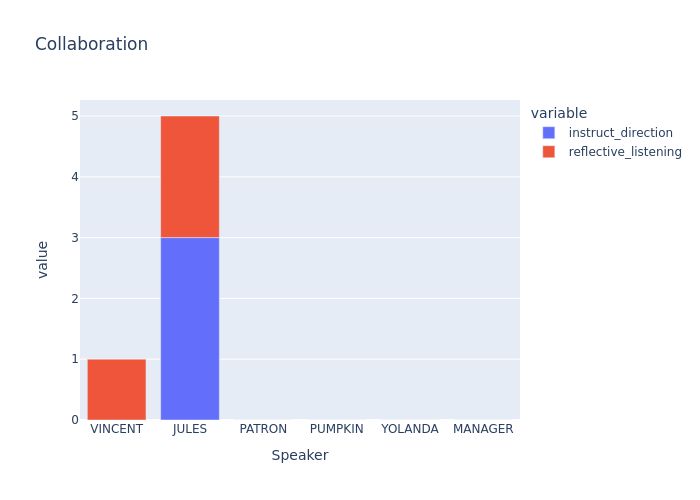

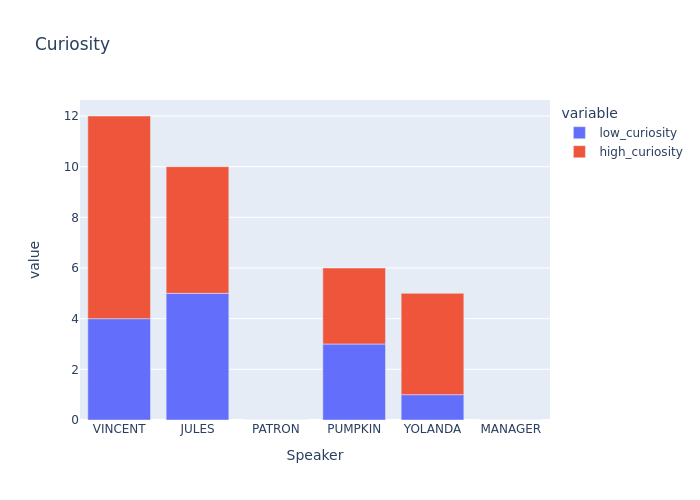

In [39]:
import plotly.express as px

fig = px.bar(df, x="Speaker", y=['appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',
       'reflective_listening'], title="Behaviors")
fig.show("png")

fig = px.bar(df, x="Speaker", y=['appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',
       'reflective_listening'], title="Behaviors - Group")
fig.update_layout(barmode='group')
fig.show("png")

fig = px.bar(df, x="Speaker", y=[
       'instruct_direction',
       'reflective_listening'], title="Collaboration")
fig.show("png")

fig = px.bar(df, x="Speaker", y=[
       'low_curiosity',
       'high_curiosity',
      ], title="Curiosity")
fig.show("png")





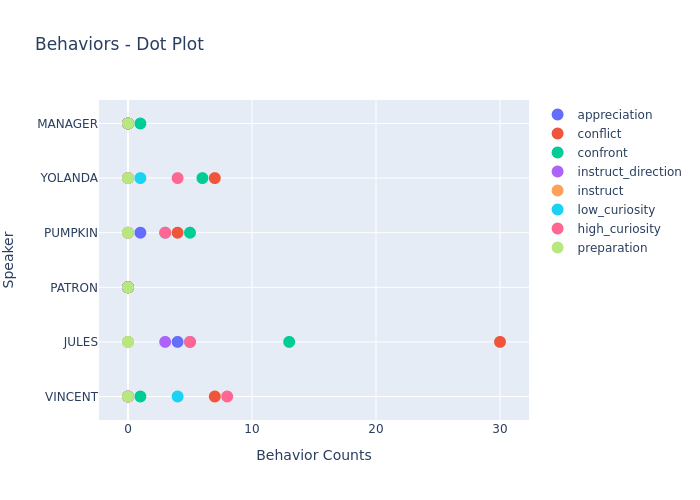

In [40]:
import plotly.graph_objects as go

fig = go.Figure()

behaviors = [       'appreciation',
       'conflict',
       'confront',
       'instruct_direction',
       'instruct',
       'low_curiosity',
       'high_curiosity',
       'preparation',]

for b in behaviors:
    fig.add_trace(go.Scatter(
        x=df[b],
        y=df['Speaker'],
        marker=dict(size=12),
        mode="markers",
        name=b,
    ))





fig.update_layout(title="Behaviors - Dot Plot",
                  xaxis_title="Behavior Counts",
                  yaxis_title="Speaker")

fig.show("png")